# Notebook 3: Flow control

### by Justin B. Kinney

In [1]:
# Always put this first
%matplotlib inline
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## If, elif, else blocks

If blocks allow blocks of code to be executed only under specific conditions.

In [2]:
x = 5
y = 6

if x==y:
    print 'In block 1'
    print 'They are equal!'
    
elif x>y:
    print 'In block 2'
    print 'x is more than y'

else:
    print 'In block 3'
    print 'y is more than x'

In block 3
y is more than x


Note the indentation within each code block. It is essential that all code within the same block have the same indentation level. For instance, the following code won't even run.

[PEP 8](https://www.python.org/dev/peps/pep-0008/) sytle specifies that code blocks should be indented not with tabs but with **4 spaces**. This makes code maintenence a lot easier. I strongly recommend you adhere to this convention. 

## Loops

In some fundamental sense, "loops" are what make a program a program. As in most programming languages there are two primary kinds of loops: "for" loops and "while" loops. 

``for`` loops execute the enclosed "code block" for each element in an array (such as a list)

In [3]:
# Print all characters in a string one-by-one
s = 'Hi there URPs!'
for c in s:
    print c

H
i
 
t
h
e
r
e
 
U
R
P
s
!


In [4]:
s = 'Hi there URPs!'
[x for x in enumerate(s)]

[(0, 'H'),
 (1, 'i'),
 (2, ' '),
 (3, 't'),
 (4, 'h'),
 (5, 'e'),
 (6, 'r'),
 (7, 'e'),
 (8, ' '),
 (9, 'U'),
 (10, 'R'),
 (11, 'P'),
 (12, 's'),
 (13, '!')]

In [5]:
# Print all characters in a string one-by-one
s = 'Hi there URPs!'
for i,c in enumerate(s):
    print "line: %d, chracter: %s"%(i,c)

line: 0, chracter: H
line: 1, chracter: i
line: 2, chracter:  
line: 3, chracter: t
line: 4, chracter: h
line: 5, chracter: e
line: 6, chracter: r
line: 7, chracter: e
line: 8, chracter:  
line: 9, chracter: U
line: 10, chracter: R
line: 11, chracter: P
line: 12, chracter: s
line: 13, chracter: !


In [6]:
# Create a list of numbers up to (but not including 10)
range(1,10,2)

[1, 3, 5, 7, 9]

In [7]:
# To print all nubmers from 0 to 9
for x in range(10):
    print x

0
1
2
3
4
5
6
7
8
9


The ``while`` loop keeps going as long as the argument it is passed evaluates to "True"

In [8]:
# Print a geometric progression of numbers up to some specific value
x = 1
x_max = 3
while x < x_max:
    x *= 1.1
    print x

1.1
1.21
1.331
1.4641
1.61051
1.771561
1.9487171
2.14358881
2.357947691
2.5937424601
2.85311670611
3.13842837672


When using while loops, make very sure that your loop will actually end at some point. If your loop continues without end, go to "Kernel -> Interrupt" in the menu above. If your computer still acts strange, select "Kernel -> Restart". You will then have to evaluate your ipython notebook from the beginning. 

## Example: computing $\pi$

We will now write a function to compute $\pi$ using the **Leibnitz series**:

$$\pi = 4 \left(1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \cdots + \frac{(-1)^n}{2n+1} + \cdots \right)$$



In [9]:
# Compute the first 500 terms in the Leibnitz series
pi_v1 = 0
for n in range(50000):
    pi_v1 += 4 * (-1)**n / (2*n + 1)
    
print 'approximation:\n %0.10f'%pi_v1
print 'real:\n %0.10f'%np.pi

approximation:
 3.1415726536
real:
 3.1415926536


Here's a better approximation, the **Madhava series**:

$$ \pi = \sqrt{12} \left( 1 - \frac{1}{3 \cdot 3} + \frac{1}{5 \cdot 3}  - \frac{1}{7 \cdot 3^3}  + \cdots + \frac{(-1)^n}{(2n+1)\cdot 3^n} + \cdots\right) $$

In [10]:
# Compute the first 20 terms in the Madhava series
pi_v2 = 0
for n in range(20):
    pi_v2 += np.sqrt(12) * (-1.)**n / ((2*n + 1.)*3**n)
    
print 'approximation:\n %0.10f'%pi_v2
print 'real:\n %0.10f'%np.pi

approximation:
 3.1415926536
real:
 3.1415926536


Another way to compute $\pi$ is the **dartboard method**: compute the fraction of random numbers within the unit square that are within distance 1/2 of the point (0.5,0.5). 

In [11]:
N = 10000  # Number of darts to throw
xs = np.random.rand(N)
ys = np.random.rand(N)
dists = np.sqrt((xs-.5)**2 + (ys-.5)**2)
hits = dists < .5
print hits
print ~hits

[ True  True  True ...,  True  True  True]
[False False False ..., False False False]


approximation:
 3.1396000000
real:
 3.1415926536


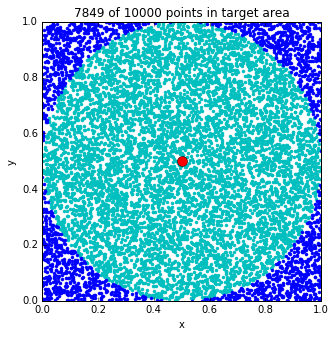

In [12]:
# Compute pi using the dartboard method
N = 10000  # Number of darts to throw
xs = np.random.rand(N)
ys = np.random.rand(N)
dists = np.sqrt((xs-.5)**2 + (ys-.5)**2)
hits = dists < .5
pi_v3 = 4*sum(hits)/N

print 'approximation:\n %0.10f'%pi_v3
print 'real:\n %0.10f'%np.pi

# Plot points used in the dartboard approximation
N_max = 1E4
if N <= N_max:
    plt.figure(figsize=[5,5])
    plt.plot(xs[hits],ys[hits],'.c')
    plt.plot(xs[~hits],ys[~hits],'.b')
    plt.plot(.5,.5,'or',markersize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('%d of %d points in target area'%(sum(hits),N))
else:
    print 'Will plot up to %d points. %d is too many.'%(N_max,N)

## Functions

Finally, we illustrate how to define a function. Instead of defining a single line function (which is readily done), the following example illustrates various good practices

In [13]:
def factorial(n):
    """Returns n factorial. n must be a nonnegative integer.""" # This is a "doc string"
    
    # Thow an error if n does not have the right form
    assert isinstance(n,int),'Input is not an integer' 
    assert n >= 0,'Input is not nonnegative' 
    assert n <= 1000,'Intput is too large!'
    
    # Initialize return variable
    val = 1
    
    # Loop over i=1,2,...,n
    for i in range(1,n+1):   
        val *= i
        
    return val  # Returns val to the user

We test this function by computing n! for n=1,2,...10

In [14]:
for n in range(10):
    print str(n) + '! is ' + str(factorial(n))

0! is 1
1! is 1
2! is 2
3! is 6
4! is 24
5! is 120
6! is 720
7! is 5040
8! is 40320
9! is 362880


Just as important as making sure functions corectly process valid input correctly is to make sure they FAIL when provided with invalid input. Before a function does anything, it should test the validity of its input

In [15]:
# This should fail
print factorial(1.1)

AssertionError: Input is not an integer

In [16]:
# This should fail
print factorial(-10)

AssertionError: Input is not nonnegative

In [17]:
# This should fail
print factorial("I'm not even a number!")

AssertionError: Input is not an integer

In [18]:
# Also worth testing boundary cases
print factorial(1000)

4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

The docstring is accessible from within python, and is often very useful. Execute the following command and a window will pop up that describes what this function does.

In [19]:
# Display docstring for factorial()
factorial?

## Exercise

1) Use a while loop to determine the number of terms in the Leibnitz approximation for $\pi$ needed to achieve a specified accuracy. 

2) Encapsulate this code in a function which that takes the specified accuracy as an argument. Check user input to make sure that it makes sense. 

In [ ]:
# Write code for Exercise 1 here

In [ ]:
# Write code for Exercise 2 here